# **Análsiis de intersección** 

Este notebook contiene en el código necesario para identificar los genes en común entre los genes enriquecidos en **neo-loops**, los genes diferencialmente expresados en la línea célular **FaDu sometida a radioterapía** y el listado de **anticuerpos** disponible.

In [10]:
# Librerías para el análisis de intersección de listas (Diagrama de Venn)
import matplotlib.pyplot as plt
from matplotlib_venn import venn2 
from matplotlib_venn import venn3

In [3]:
# Procesos y genes de los neo-loops

collagen_trimerization = ["COL11A1", "COL16A1", "COL1A1", "COL12A1", "COL9A1", "COL21A1", "COL5A1", "COL4A2", "COL2A1", "COL6A1", "COL6A2", "COL8A1", 
                          "COL26A1", "COL18A1", "COL4A1", "COL14A1"]
cornified = ["PRSS8", "DSP", "CSTA", "SPINK5", "PCSK6", "PKP4", "LCE2B", "SPRR2G", "IVL", "SPRR3", "SPRR2D", "KRT1", "KRT24", "SPRR1B", "SPRR1A", 
             "KRT78", "KRT4", "KRT72", "KRT27", "LCE1D", "KRT2", "KRT76", "KRT79", "KRT73", "LCE1E", "KRT26", "KRT3", "LCE1A", "LCE4A", "LCE2A", 
             "LCE2C", "LCE2D", "KRT77", "LCE1B", "SPRR2B", "LCE1C", "LORICRIN", "LELP1", "SPRR2E", "KRT25", "LCE6A", "LCE1F", "SPRR2A", "SPRR2F"]
collagen_enztmes = ["TLL1", "COL11A1", "COL16A1", "P3H2", "COL1A1", "COL12A1", "COL9A1", "COL21A1", "COL5A1", "COL4A2", "ADAMTS14", "COL2A1", "COL6A1", 
                    "COL6A2", "COL8A1", "COL26A1", "PCOLCE2", "COL18A1", "COL4A1", "COL14A1"]
Keratinization = ["PRSS8", "DSP", "CSTA", "SPINK5", "PCSK6", "PKP4", "LCE2B", "SPRR2G", "IVL", "SPRR3", "SPRR2D", "KRT1", "KRT24", "SPRR1B", "SPRR1A", 
                  "KRT78", "KRT4", "KRT72", "KRT27", "LCE1D", "KRT2", "KRT76", "KRT79", "KRT73", "LCE1E", "KRT26", "KRT3", "LCE1A", "LCE4A", "LCE2A", 
                  "KRTAP12-1", "LCE2C", "LCE2D", "KRTAP10-8", "KRTAP10-6", "KRTAP10-12", "KRT77", "LCE1B", "SPRR2B", "LCE1C", "LORICRIN", "LELP1", 
                  "SPRR2E", "KRT25", "KRTAP12-3", "KRTAP10-2", "KRTAP12-4", "KRTAP10-3", "KRTAP10-4", "KRTAP10-1", "KRTAP10-9", "KRTAP10-10", "KRTAP12-2", 
                  "LCE6A", "LCE1F", "KRTAP10-5", "SPRR2A", "KRTAP10-11", "SPRR2F", "KRTAP10-7"]

In [4]:
# Unir todas las listas de genes en una sola y eliminar duplicados
genes_neoloops = list(set(collagen_trimerization + cornified + collagen_enztmes + Keratinization))
set1 = set(genes_neoloops)
print(f"Número de genes únicos en Neo-loops: {len(genes_neoloops)}")

Número de genes únicos en Neo-loops: 80


In [5]:
# Genes del transcriptoma IrrWT vs Control FaDu
genes_rnaseq = [
    "FNDC7", "IL1R2", "AMPD1", "STC1", "LOC101928841", "ABCC9", "LINC01537", "CXCL11", 
    "IL6", "TG", "SPRY4", "ASB2", "FES", "SPRR1A", "ANPEP", "ALPL", "TRPV3", "IL1RL1", 
    "DOC2B", "LCK", "LOC105371926", "EGR4", "APLN", "IGFL1", "PDCD1LG2", "CDH11", 
    "CYTH4", "NKD2", "KRT75", "ADRA1B", "LOC105370624", "NT5E", "CNGB1", "CYP24A1", 
    "CLDN3", "DTNA", "LAPTM5", "NCF2", "SEMA7A", "MMP1", "PGF", "LOC107986649", "LIF", 
    "SLC12A7", "MAP1B", "MMP10", "WTAPP1", "SCN5A", "IL24", "CXCL8", "RYR2", "DUSP6", 
    "HRH2", "CEACAM1", "KIF1A", "BEAN1", "CPNE5", "TMEM92", "LIF-AS2", "MATN3", "MUC2", 
    "DUSP1", "CAPN5", "ODC1", "KRT81", "LOC105371912", "RIPOR3", "CD163L1", "SPRED3", 
    "NHSL2", "CST6", "FLVCR2", "PCDH19", "SAP30L-AS1", "SHISA2", "LOC105378230", "FN1", 
    "RTL5", "IRAK2", "ITGA7", "ELFN2", "C9orf47", "DOCK4", "TRIML2", "HSH2D", "INHBA", 
    "CATSPER1", "MERTK", "IL11", "ADAM8", "KIAA1549L", "CCL22", "PLEKHG4B", "MYEOV", 
    "DPF3", "TH", "DUSP8", "RASSF2", "SLC22A4", "PLAUR", "SNAI1", "DUSP5", "MMP2", 
    "NEURL1", "IFI27", "STMN3", "CCN3", "ISG20", "UFSP1", "NFATC2", "LBH", "RAB3B", 
    "OTUB2", "KRT7", "HES6", "ADAM12", "LINC00941", "KCNQ4", "LOC101927245", "KRT7-AS", 
    "NPY1R", "MAP1A", "PLK3", "DAPP1", "FST", "KIF5C", "CARMIL2", "DCLK1", "MIG7", 
    "GRK5", "LTB", "CD24", "SPRR1B", "NES", "CCDC74A", "CCN2", "CLSTN2", "TCN2", "MX1", 
    "PRR5L", "IFI6", "PADI1", "KRT16P2", "COL8A1", "MCF2L", "APLP1", "ITGA2", "RPLP0P2", 
    "OAS2", "CDKN1A", "BRSK2", "KRT87P", "TENT5C", "DUSP4", "SLC5A4-AS1", "PARM1", 
    "TMEM158", "SPOCK1", "SLIT2", "PIK3AP1", "SCN3A", "ARHGAP31", "RAB6B", "MX2", 
    "HPCAL1", "PHLDA1", "LOC102723480", "ADAM19", "CEMIP", "LIPH", "ADAMTS17", "GNAT2", 
    "ETV5", "PTGS2", "DLX1", "PLCB4", "DNAJC22", "RSAD2", "IER3", "RIGI", "IL7R", 
    "CYSRT1", "SOX9", "TEX14", "LETM2", "GPR68", "TTLL13", "MGLL", "HBEGF", "MYRF", 
    "C2CD4D-AS1", "IER3-AS1", "GPSM3", "TRIM36", "CYP26A1", "PDGFB", "COL5A3", "FZD8", 
    "UNC79", "EVA1A", "CEMIP2", "N4BP3", "TMEM63C", "NOCT", "DISP2", "GPR50", "NPTX1", 
    "PDE10A", "HAP1", "TNFRSF9", "RNASE7", "DLC1", "IFIT2", "PRSS27", "PRLR", 
    "LOC105371553", "APBB1", "MMP12", "LOC105370364", "SERPINA1", "GAS7", "GABRQ", 
    "HPCAL4", "S1PR3", "JAK3", "PRDM16", "FCMR", "MSLN", "LIMD2", "RASL11A", "GJB2", 
    "ISG15", "LINC01348", "TAFA3", "CNTNAP1", "LOC105369370", "ABLIM1", "CLTRN", 
    "TNFAIP3", "FLI1", "SPHK1", "CD55", "PXDN", "PPM1K", "FOSB", "CD83", "ITPR1", 
    "TMEM198", "ATF3", "NPR1", "SEC14L4", "VCAN", "LINC00680", "FOSL1", "SPRY2", 
    "B3GNT3", "EGR3", "CSRNP1", "BNIP3", "LOC107987300", "ENTPD2", "CCND2-AS1", 
    "PTGER4", "LTBP2", "SMPD1", "GPRC5B", "ABCD1", "PPP2R5B", "PPM1M", "CLDN9", 
    "SLCO4A1-AS1", "TIMP3", "IFIT1", "RPE65", "VEGFC", "GPR3", "HELZ2", "MALL", 
    "MMP13", "SRCIN1", "FSIP1", "PMAIP1", "EPHA4", "TNFSF15"
]

# Tamaño del transcriptoma IrrWT vs Control FaDu
print(len(genes_rnaseq))  # 284 genes 


284


In [6]:
# Genes del listado dado de anticuerpos
genes_ab = [
    "ITGB3", "MMP1", "MMP2", "MMP7", "MMP8", "MMP11", "MMP13", "MMP14",
    "MMP17", "MMP19", "MMP28", "TIMP3", "COL1A1", "FN1"
]

print(len(genes_ab))  # 14 genes

14


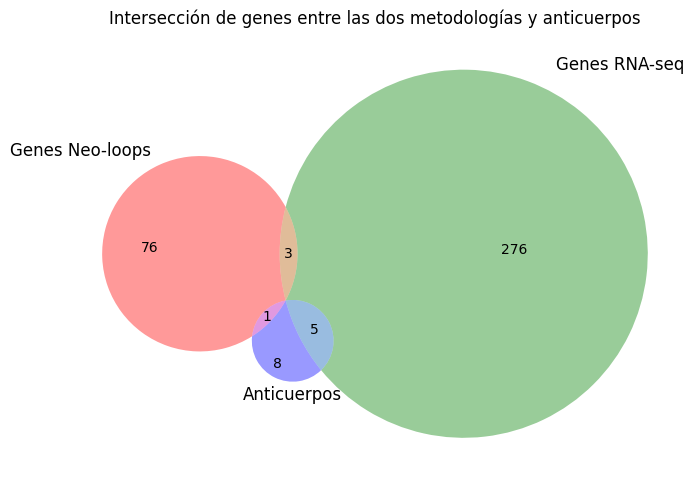

In [11]:
from matplotlib_venn import venn3

# Convertimos las listas a conjuntos para poder calcular intersecciones
set1 = set(genes_neoloops)
set2 = set(genes_rnaseq)
set3 = set(genes_ab)

# Crear diagrama de Venn
plt.figure(figsize=(8,8))
venn3([set1, set2, set3], set_labels=('Genes Neo-loops', 'Genes RNA-seq', 'Anticuerpos'))

# Mostrar diagrama
plt.title("Intersección de genes entre las dos metodologías y anticuerpos")
plt.show()

In [15]:
# Imprimir las intersecciones
print("Intersección entre Neo-loops y RNA-seq:", set1.intersection(set2))
print("Intersección entre Neo-loops y Anticuerpos:", set1.intersection(set3))
print("Intersección entre RNA-seq y Anticuerpos:", set2.intersection(set3))
print("Intersección entre los tres conjuntos:", set1.intersection(set2).intersection(set3))


Intersección entre Neo-loops y RNA-seq: {'COL8A1', 'SPRR1A', 'SPRR1B'}
Intersección entre Neo-loops y Anticuerpos: {'COL1A1'}
Intersección entre RNA-seq y Anticuerpos: {'TIMP3', 'FN1', 'MMP1', 'MMP2', 'MMP13'}
Intersección entre los tres conjuntos: set()


Informacíon de la sesión:

In [16]:
# Información de la sesión
!python --version

Python 3.12.1


In [17]:
!pip list

Package                   Version
------------------------- ---------
adjustText                1.0.4
asttokens                 2.4.1
attrs                     25.3.0
certifi                   2025.4.26
charset-normalizer        3.4.2
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.2.0
cycler                    0.12.1
debugpy                   1.8.2
decorator                 5.1.1
docopt                    0.6.2
et_xmlfile                2.0.0
executing                 2.0.1
fastjsonschema            2.21.1
fonttools                 4.47.2
ftpretty                  0.4.0
goatools                  1.4.12
gseapy                    1.1.8
idna                      3.10
ipykernel                 6.29.5
ipython                   8.26.0
jedi                      0.19.1
joblib                    1.4.2
jsonschema                4.23.0
jsonschema-specifications 2025.4.1
jupyter_client            8.6.2
jupyter_core              5.7.2
kiwisolver         


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
